In [100]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

In [101]:
df = pd.read_csv('data/boston.csv')

In [102]:
import re
from itertools import chain

# Use regular expression to remove unwanted characters
df["amenities"] = df["amenities"].str.split(",")

# remove {,}," and extra spaces
df["amenities"] = df["amenities"].apply(
    lambda x: [re.sub(r'["{}]', "", a).strip() for a in x])

# remove empty strings and translation missing
df["amenities"] = df["amenities"].apply(
    lambda x: [a for a in x if a and not a.startswith("translation missing: ")])

# flatten the list of lists
df_amenities = pd.Series(list(chain.from_iterable(df["amenities"].tolist()))).value_counts() 
df_amenities = df_amenities.reset_index() # convert to dataframe
df_amenities.columns = ["amenities", "count"]  # rename columns

df_amenities

,amenities,count
0,Wifi,3426
1,Smoke detector,3422
2,Heating,3401
3,Essentials,3308
4,Carbon monoxide detector,3226
5,Hangers,3149
6,Kitchen,3100
7,Hair dryer,3013
8,Iron,3003
9,Air conditioning,2944


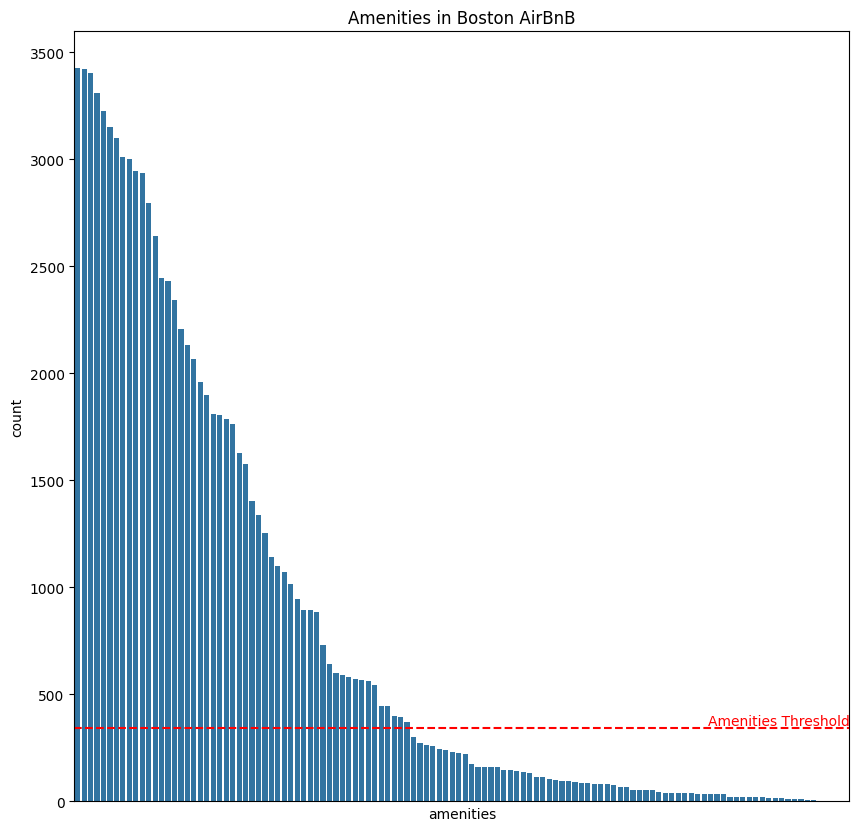

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# remove the amenities that less than 10% from the largest value
amenities_threshold = df_amenities["count"].max() * 0.1
insufficient_amenities = df_amenities[df_amenities["count"]
                                      < amenities_threshold]

plt.figure(figsize=(10, 10))
sns.barplot(data=df_amenities, y="count", x="amenities")
plt.title("Amenities in Boston AirBnB")
plt.xticks([])
plt.axhline(y=amenities_threshold, color='r',
            linestyle='--')  # Add threshold line

# Add threshold label at the rightmost position
plt.text(plt.xlim()[1], amenities_threshold,
         'Amenities Threshold', color='r', va='bottom', ha='right')

plt.show()

In [104]:
# remove them from the dataframe
df_amenities = df_amenities[~df_amenities["amenities"].isin(
    insufficient_amenities["amenities"])]
df_amenities

,amenities,count
0,Wifi,3426
1,Smoke detector,3422
2,Heating,3401
3,Essentials,3308
4,Carbon monoxide detector,3226
5,Hangers,3149
6,Kitchen,3100
7,Hair dryer,3013
8,Iron,3003
9,Air conditioning,2944


### Grouping similar amenities


In [105]:
amenities_groups = [
    {
        "name": "Internet",
        "values": ["Wifi", "Internet"]
    },
    {
        "name": "TV",
        "values": ["Cable TV", "TV"]
    },
    {
        "name": "Paid Parking",
        "values": ["Paid parking on premises",
                   "Paid parking off premises"]
    },
    {
        "name": "Free Parking",
        "values": ["Free parking on premises",
                   "Free parking off premises"]
    }
]



df_amenities = df_amenities.copy()

# Create a new column 'group' with default value as NaN
df_amenities["group"] = ''

# Assign group names to the 'group' column based on 'amenities' column values
for group in amenities_groups:
    df_amenities.loc[df_amenities["amenities"].isin(group["values"]), "group"] = group["name"]


df_amenities


,amenities,count,group
0,Wifi,3426,Internet
1,Smoke detector,3422,
2,Heating,3401,
3,Essentials,3308,
4,Carbon monoxide detector,3226,
5,Hangers,3149,
6,Kitchen,3100,
7,Hair dryer,3013,
8,Iron,3003,
9,Air conditioning,2944,


In [106]:

# one hot encoding based on df_amenities
df_amenities = df_amenities["amenities"].tolist()

df = df.join(df["amenities"].apply(lambda x: pd.Series(
    [1 if a in x else 0 for a in df_amenities], index=df_amenities)))

df.drop(columns=["amenities"], inplace=True)

df.shape

(3507, 157)